In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("titanic.csv")

In [2]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [3]:
df = df.rename({"Siblings/Spouses Aboard": "Sbsp"}, axis=1)
df.head()

,Survived,Pclass,Sex,Age,Sbsp,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
df=df.rename({"Parents/Children Aboard": "Parch"}, axis=1)
df.head()

,Survived,Pclass,Sex,Age,Sbsp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   Sbsp      887 non-null    int64  
 5   Parch     887 non-null    int64  
 6   Fare      887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


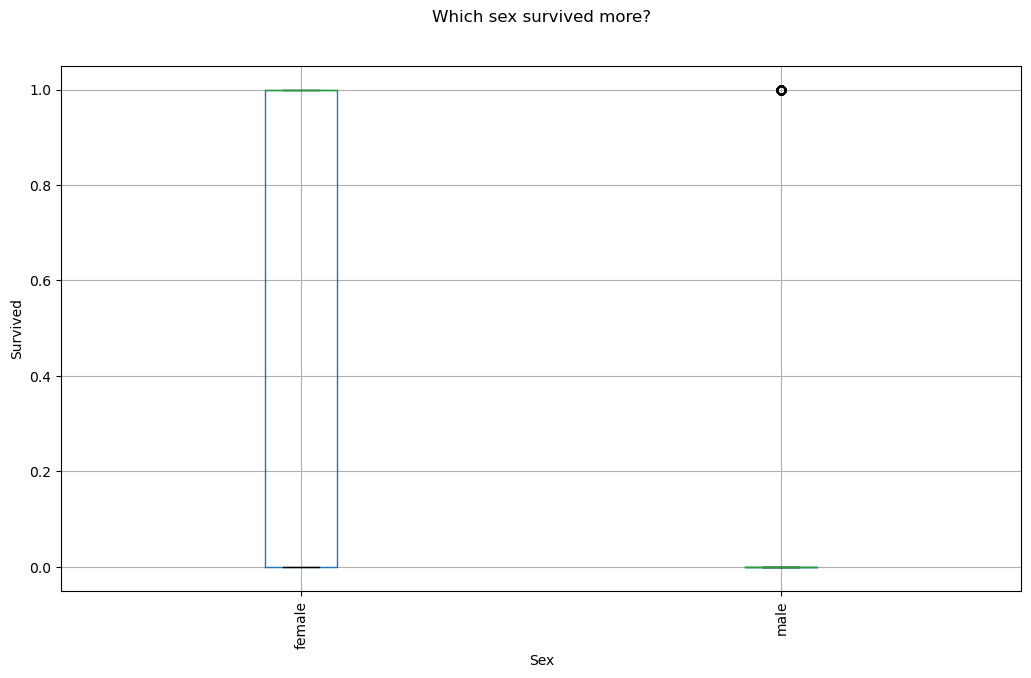

In [6]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Survived', 'Sex', ax=ax)
plt.suptitle('Which sex survived more?')
plt.title('')
plt.ylabel('Survived')
plt.xticks(rotation=90)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Sex'].unique

<bound method Series.unique of 0      1
1      0
2      0
3      0
4      1
      ..
882    1
883    0
884    0
885    1
886    1
Name: Sex, Length: 887, dtype: int32>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    int32  
 3   Age       887 non-null    float64
 4   Sbsp      887 non-null    int64  
 5   Parch     887 non-null    int64  
 6   Fare      887 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.2 KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    int32  
 3   Age       887 non-null    float64
 4   Sbsp      887 non-null    int64  
 5   Parch     887 non-null    int64  
 6   Fare      887 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.2 KB


In [10]:
df = df.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    float64
 1   Pclass    887 non-null    float64
 2   Sex       887 non-null    float64
 3   Age       887 non-null    float64
 4   Sbsp      887 non-null    float64
 5   Parch     887 non-null    float64
 6   Fare      887 non-null    float64
dtypes: float64(7)
memory usage: 48.6 KB


In [11]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [12]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [13]:
y_pred = linear_reg.predict(X)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = np.sqrt(mean_squared_error(y, y_pred))

In [15]:
error

0.37780590063615915

In [16]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [17]:
y_pred = dec_tree_reg.predict(X)

In [18]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

0.10026271390739012

In [19]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [20]:
y_pred = random_forest_reg.predict(X)

In [21]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

0.1640747730652531

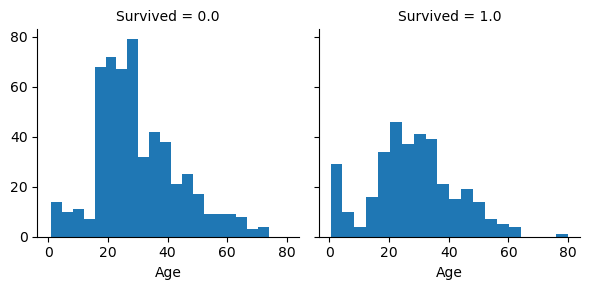

In [22]:
import seaborn as sns
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [23]:
df.describe()

,Survived,Pclass,Sex,Age,Sbsp,Parch,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.645998,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


In [24]:
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [25]:
regressor = gs.best_estimator_
regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
error

0.33590750341336567

In [26]:
from xgboost.sklearn import XGBRegressor
xgb_regressor = XGBRegressor(random_state=0)
xgb_regressor.fit(X, y.values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [27]:
y_pred = xgb_regressor.predict(X)

In [28]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

0.12476627292078118

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

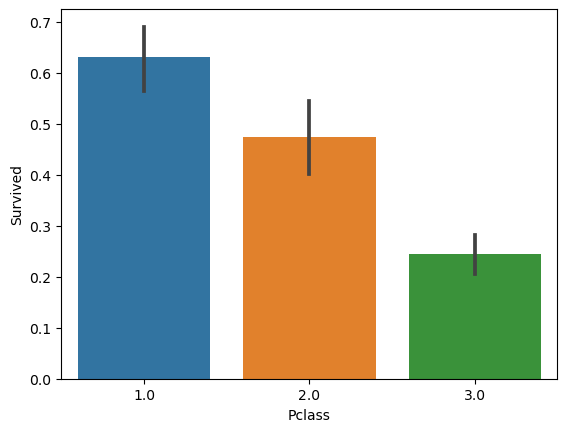

In [29]:
 sns.barplot(x='Pclass', y='Survived', data=df)

In [30]:
X

,Pclass,Sex,Age,Sbsp,Parch,Fare
0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,35.0,1.0,0.0,53.1000
4,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
882,2.0,1.0,27.0,0.0,0.0,13.0000
883,1.0,0.0,19.0,0.0,0.0,30.0000
884,3.0,0.0,7.0,1.0,2.0,23.4500
885,1.0,1.0,26.0,0.0,0.0,30.0000


In [31]:
y_pred = dec_tree_reg.predict(X)

In [32]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

0.10026271390739012

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    float64
 1   Pclass    887 non-null    float64
 2   Sex       887 non-null    float64
 3   Age       887 non-null    float64
 4   Sbsp      887 non-null    float64
 5   Parch     887 non-null    float64
 6   Fare      887 non-null    float64
dtypes: float64(7)
memory usage: 48.6 KB


In [34]:
X = X.astype('float')
X

,Pclass,Sex,Age,Sbsp,Parch,Fare
0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,35.0,1.0,0.0,53.1000
4,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
882,2.0,1.0,27.0,0.0,0.0,13.0000
883,1.0,0.0,19.0,0.0,0.0,30.0000
884,3.0,0.0,7.0,1.0,2.0,23.4500
885,1.0,1.0,26.0,0.0,0.0,30.0000


In [43]:
X = np.array([[1, 'female', 30, 1, 0, 7.250]])
X

array([['1', 'female', '30', '1', '0', '7.25']], dtype='<U32')

In [44]:
X[:, 1] = le_sex.transform(X[:,1])
X = X.astype('float')
X

array([[ 1.  ,  0.  , 30.  ,  1.  ,  0.  ,  7.25]])

In [45]:
df = df.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    float64
 1   Pclass    887 non-null    float64
 2   Sex       887 non-null    float64
 3   Age       887 non-null    float64
 4   Sbsp      887 non-null    float64
 5   Parch     887 non-null    float64
 6   Fare      887 non-null    float64
dtypes: float64(7)
memory usage: 48.6 KB


In [46]:
y_pred = dec_tree_reg.predict(X)
y_pred

C:\Users\justi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1.])

In [47]:
import pickle

In [48]:
data = {"model": dec_tree_reg, "le_sex": le_sex}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [49]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data['model']
le_sex = data['le_sex']

In [50]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\justi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1.])